51
0
100
0
105
256


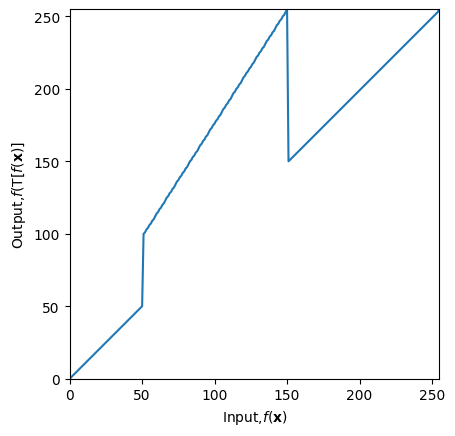

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c=np.array([(50,50),(50,100),(150,255),(150,150)])

line1=np.linspace(0,c[0,1], c[0,0]+1-0).astype('uint8')
print(len(line1))
line2=np.linspace(c[0,1],c[1,1], c[1,0]-c[0,0]).astype('uint8')
print(len(line2))
line3=np.linspace(c[1,1],c[2,1], c[2,0]-c[1,0]).astype('uint8')
print(len(line3))
line4=np.linspace(c[2,1],c[3,1], c[3,0]-c[2,0]).astype('uint8')
print(len(line4))
line5=np.linspace(c[3,1],255, 255- c[3,0]).astype('uint8')
print(len(line5))

transform_1=np.concatenate((line1,line2,line3,line4),axis=0).astype('uint8')
transform=np.concatenate((transform_1,line5),axis=0).astype('uint8')
print(len(transform))

fig ,ax =plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input,$f(\mathbf{x})$')
ax.set_ylabel('Output,$f(\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

original_image=cv.imread('emma_gray.jpg',cv.IMREAD_COLOR)
transformed_image=cv.LUT(original_image,transform)
cv.namedWindow("Original Image",cv.WINDOW_AUTOSIZE)
original_image = cv.resize(original_image, (300, 300))  
transformed_image=cv.resize(transformed_image, (300, 300)) 
cv.imshow("Original Image",original_image)
cv.waitKey(0)
cv.imshow("Transformed Image",transformed_image)
cv.waitKey(0)
cv.destroyAllWindows()



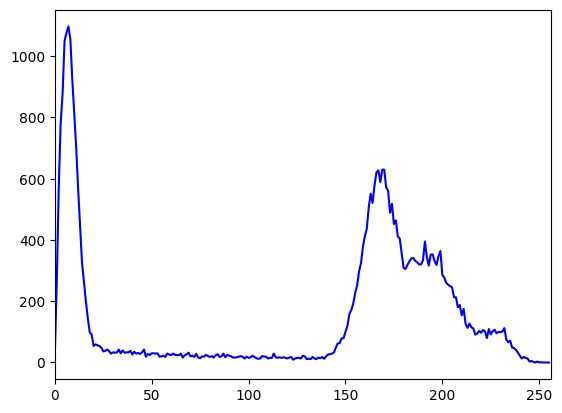

255


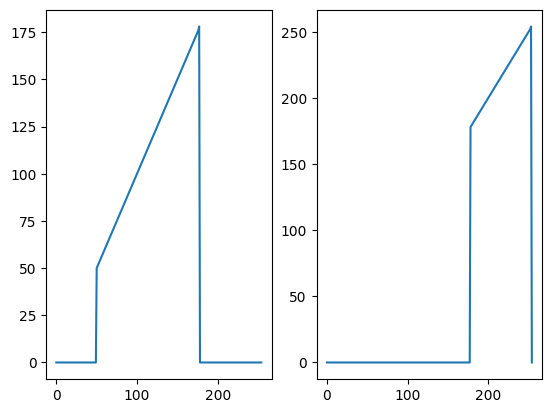

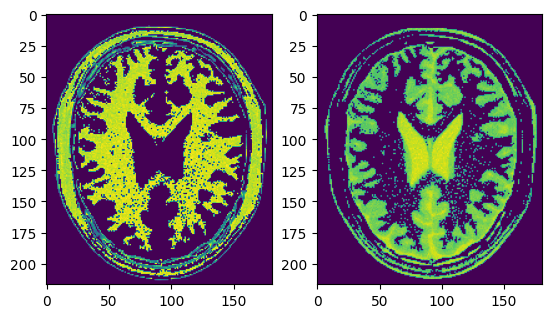

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
hist=cv.calcHist([im],[0],None,[256],[0,256])
plt.plot(hist,'b')

plt.xlim([0,256])
plt.show()

c = np.array([(50,178),(178,254)])
t1 = np.linspace(0,0,c[0,0]-0).astype(np.uint8)
t2 = np.linspace(c[0,0],c[0,1],c[0,1]-c[0,0]).astype(np.uint8)
t3 = np.linspace(0,0,255-c[0,1]).astype(np.uint8)
T1 = np.concatenate((t1, t2), axis=0).astype(np.uint8)
T2 = np.concatenate((T1, t3), axis=0).astype(np.uint8)

t4 = np.linspace(0,0,c[1,0]-0).astype(np.uint8)
t5 = np.linspace(c[1,0],c[1,1],c[1,1]-c[1,0]).astype(np.uint8)
t6 = np.linspace(0,0,255-c[1,1]).astype(np.uint8)
T3 = np.concatenate((t4, t5), axis=0).astype(np.uint8)
T4 = np.concatenate((T3,t6), axis=0).astype(np.uint8)

print(len(T2))
fig , ax = plt.subplots(1,2)
ax[0].plot(T2)
ax[1].plot(T4)


img_orig=cv.imread('brain_proton_density_slice.png',cv.IMREAD_GRAYSCALE)
image_tr1=T2[img_orig]
image_tr2=T4[img_orig]
fig , ax = plt.subplots(1,2)
ax[0].imshow(image_tr1)
ax[1].imshow(image_tr2)

Question 03

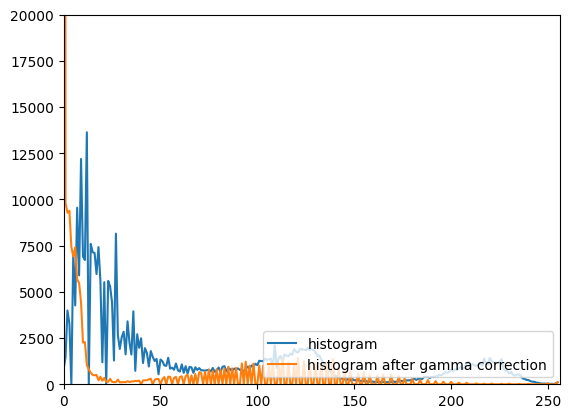

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('highlights_and_shadows.jpg',cv.IMREAD_COLOR)
im1=cv.cvtColor(im,cv.COLOR_BGR2Lab)
gamma=5
t=np.array([(i/255)**gamma*255 for i in range(0,256)]).astype(np.uint8)
tr_image=t[im1[:,:,0]]
cv.namedWindow("Original Image in L*a*b color space",cv.WINDOW_AUTOSIZE)
cv.imshow("Original Image in L*a*b color space",im1)
cv.waitKey(0)
cv.imshow("Gamma Correction to L color space",tr_image)
cv.waitKey(0)
cv.destroyAllWindows( )


hist=cv.calcHist([im1],[0],None,[256],[0,256])
gamma_hist=cv.calcHist([tr_image],[0],None,[256],[0,256])
plt.plot(hist)
plt.plot(gamma_hist)
plt.legend(["histogram", "histogram after gamma correction"], loc ="lower right")
plt.xlim([0,256])
plt.ylim([0,20000])
plt.show()

Question 05

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image=cv.imread('a1q5images\im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

scale=4
rows=int(scale*image.shape[0])
columns=int(scale*image.shape[1])

zoomed_im=np.zeros((rows,columns),dtype=image.dtype)

for i in range (0,rows):
    for j in range (0,columns):
        zoomed_im[i,j]=image[int(i/scale),int(j/scale)]

cv.namedWindow("Image",cv.WINDOW_AUTOSIZE)
cv.imshow("Image",image)
cv.waitKey(0)
cv.namedWindow("Zoomed",cv.WINDOW_AUTOSIZE)
cv.imshow("Zoomed",zoomed_im)
cv.waitKey(0)
cv.destroyAllWindows( )

Question 06

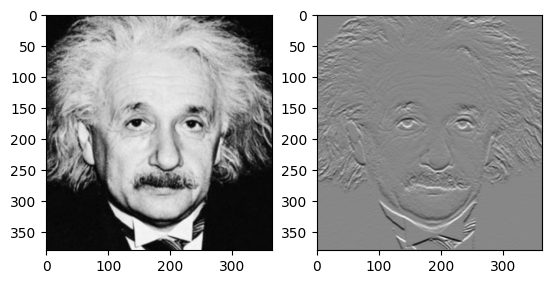

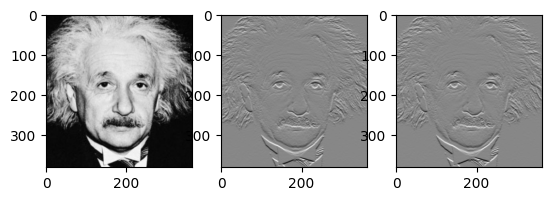

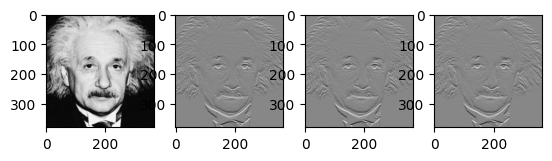

In [10]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Part a
image=cv.imread('einstein.png',cv.IMREAD_GRAYSCALE)
assert image is not None
image_float=cv.normalize(image.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)

grad_x=cv.Sobel(image_float,-1,0,1,ksize=3)
grade_x=cv.normalize(grad_x.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
fig , ax = plt.subplots(1,2)
ax[0].imshow(image,cmap='gray')
ax[1].imshow(grad_x,cmap='gray')
plt.show()

# Part b
sobel_v=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
h,w=image.shape
k_hh,k_hw=sobel_v.shape[0]//2,sobel_v.shape[1]//2
result=np.ones(image.shape,np.float32)
for m in range (k_hh,h-k_hh):
    for n in range (k_hw,w-k_hw):
        result[m,n]=np.dot(image[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten(),sobel_v.flatten())

fig , ax = plt.subplots(1,3)
ax[0].imshow(image,cmap='gray')
ax[1].imshow(grad_x,cmap='gray')
ax[2].imshow(result,cmap='gray')
plt.show()


# Part c
k1=np.array([[1],[2],[1]],np.float32)
k2=np.array([-1,0,1],np.float32)
k1filtered=cv.sepFilter2D(image_float,-1,k1,k2)

fig , ax = plt.subplots(1,4)
ax[0].imshow(image,cmap='gray')
ax[1].imshow(grad_x,cmap='gray')
ax[2].imshow(result,cmap='gray')
ax[3].imshow(k1filtered,cmap='gray')
plt.show()


Question 07

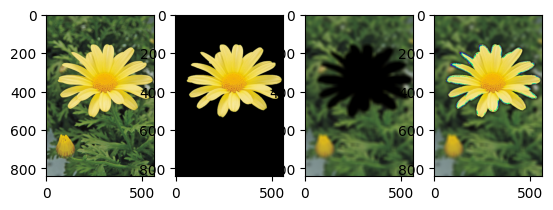

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

im = cv.imread('daisy.jpg',cv.IMREAD_COLOR)
im=cv.cvtColor(im,cv.COLOR_BGR2RGB)
mask = np.zeros(im.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (60,60,500,500)
cv.grabCut(im,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
im1 = im*mask2[:,:,np.newaxis]
background_im=im-im1
imageblur=cv.blur(background_im,(20,20))
blurred_image=im1+imageblur

fig , ax = plt.subplots(1,4)
ax[0].imshow(im)
ax[1].imshow(im1)
ax[2].imshow(imageblur)
ax[3].imshow(blurred_image)